In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,6)

In [123]:
df = pd.read_excel('./DataSets/Copy of loan.xlsx')

In [124]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [125]:
df.shape

(614, 13)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [127]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [128]:
cat = df.select_dtypes(include='object')

In [129]:
for ct in df.select_dtypes(include='object'):
    print(df[ct].value_counts(normalize=True))
    print('\n\n\n')

LP001002    0.001629
LP002328    0.001629
LP002305    0.001629
LP002308    0.001629
LP002314    0.001629
              ...   
LP001692    0.001629
LP001693    0.001629
LP001698    0.001629
LP001699    0.001629
LP002990    0.001629
Name: Loan_ID, Length: 614, dtype: float64




Male      0.813644
Female    0.186356
Name: Gender, dtype: float64




Yes    0.651391
No     0.348609
Name: Married, dtype: float64




0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64




Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64




No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64




Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64




Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64






In [130]:
# missing values

In [131]:
(df.isnull().sum()*len(df))/100

Loan_ID                0.00
Gender                79.82
Married               18.42
Dependents            92.10
Education              0.00
Self_Employed        196.48
ApplicantIncome        0.00
CoapplicantIncome      0.00
LoanAmount           135.08
Loan_Amount_Term      85.96
Credit_History       307.00
Property_Area          0.00
Loan_Status            0.00
dtype: float64

In [132]:
df.shape

(614, 13)

In [133]:
# Let's fill the missing values.

In [134]:
# Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History

In [135]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [136]:
# Again check for missing values.

In [137]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [138]:
# Let's separate the categorical and numerical variables.

In [139]:
cat = df.select_dtypes(include='object')
num = df.select_dtypes(include=np.number)

In [140]:
# Let's perform the visualization, univariate, bivariate, multivariate

<Figure size 500x400 with 0 Axes>

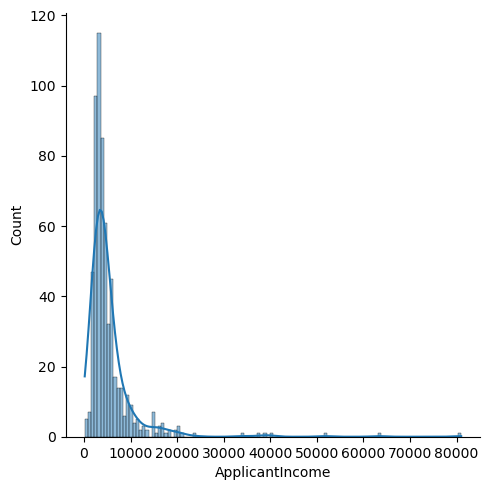

<Figure size 500x400 with 0 Axes>

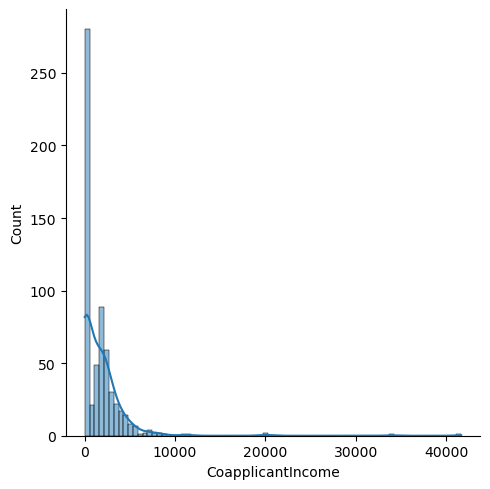

<Figure size 500x400 with 0 Axes>

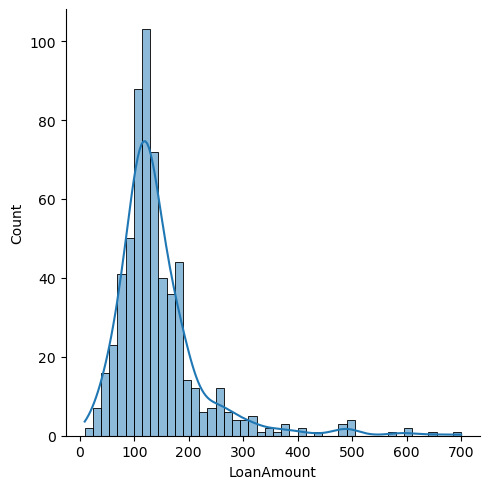

<Figure size 500x400 with 0 Axes>

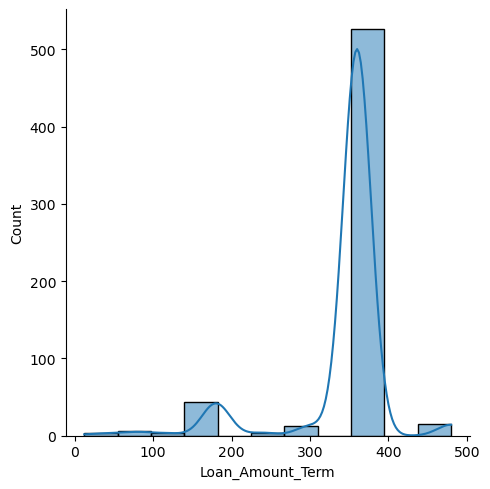

<Figure size 500x400 with 0 Axes>

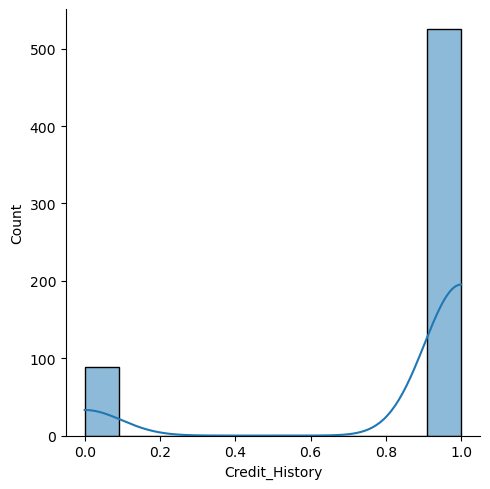

In [141]:
for n in num.columns:
        plt.figure(figsize=(5,4))
        sns.displot(num[n], kde=True)
        plt.show()



In [90]:
# Box plot to check the extend of outliers.

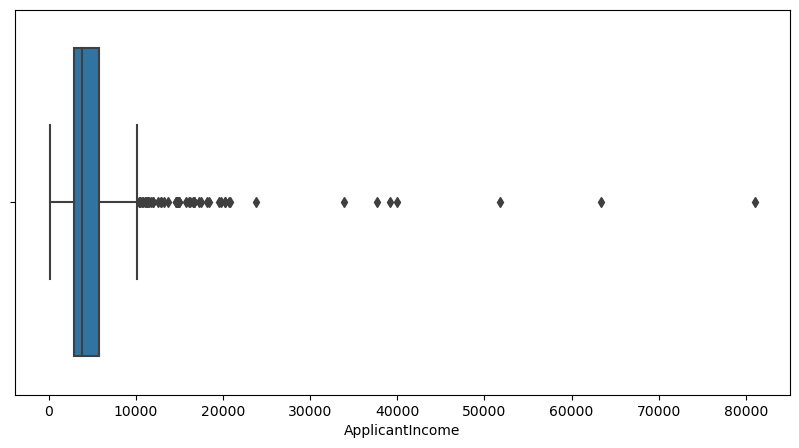

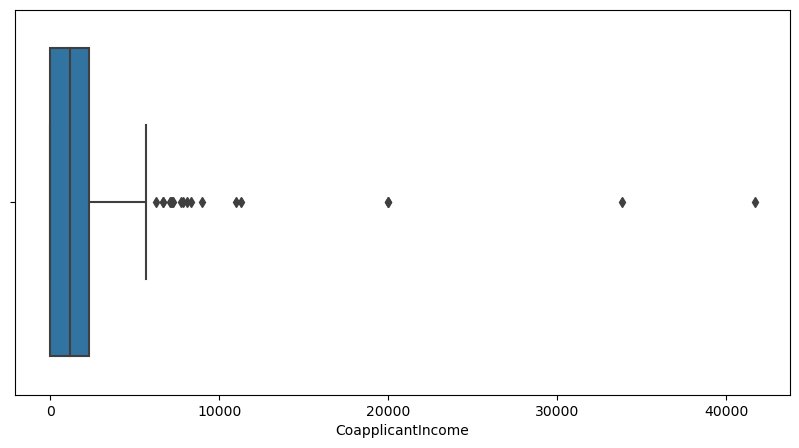

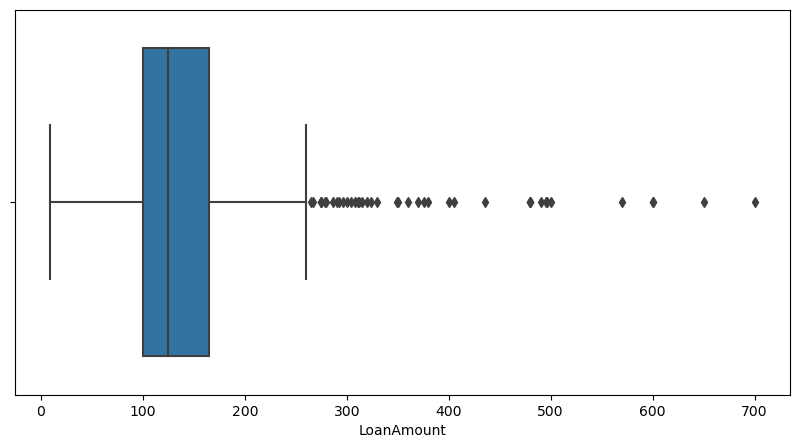

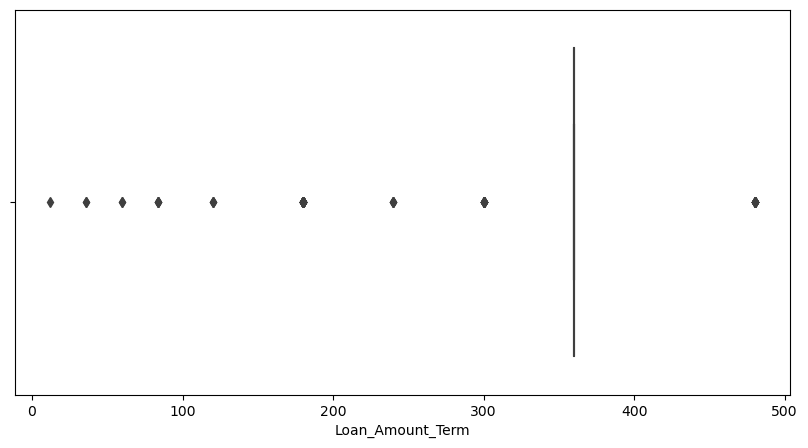

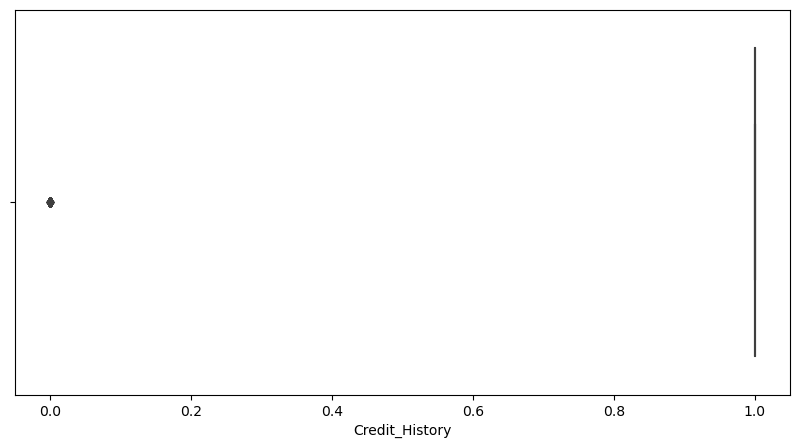

In [142]:
for out in num.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(num[out])
    plt.show()

In [92]:
# Bi variate analysis

In [143]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

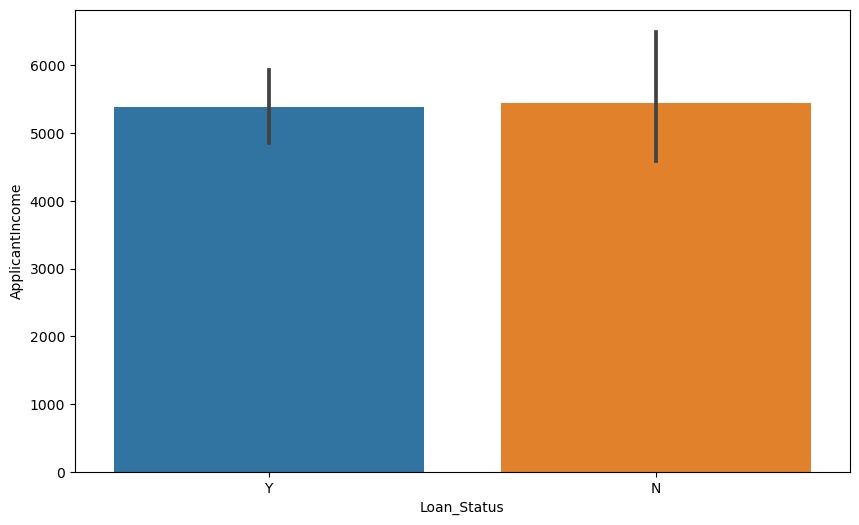

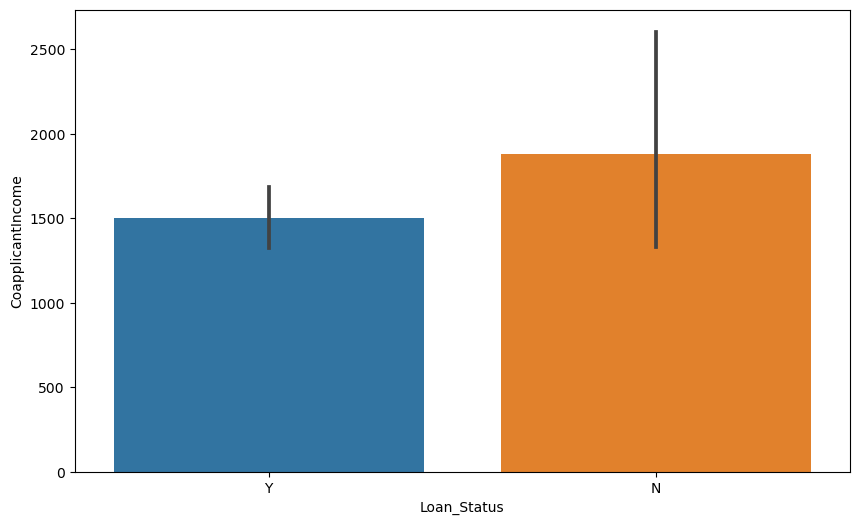

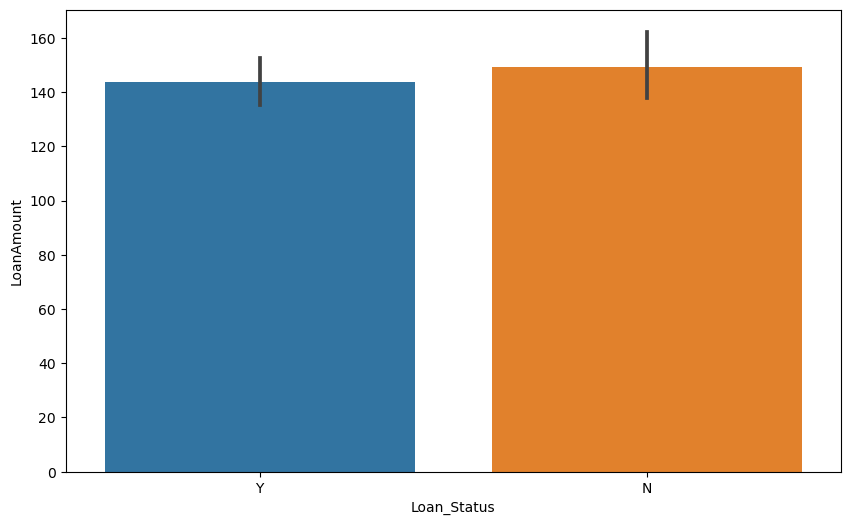

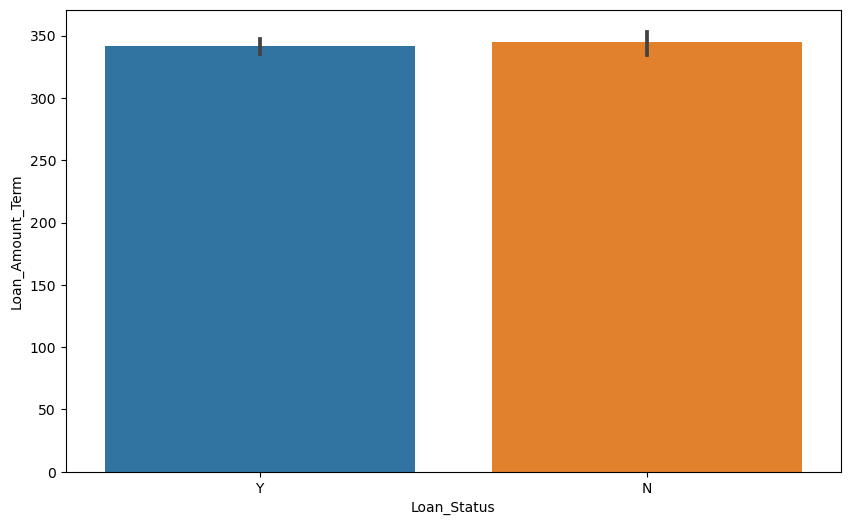

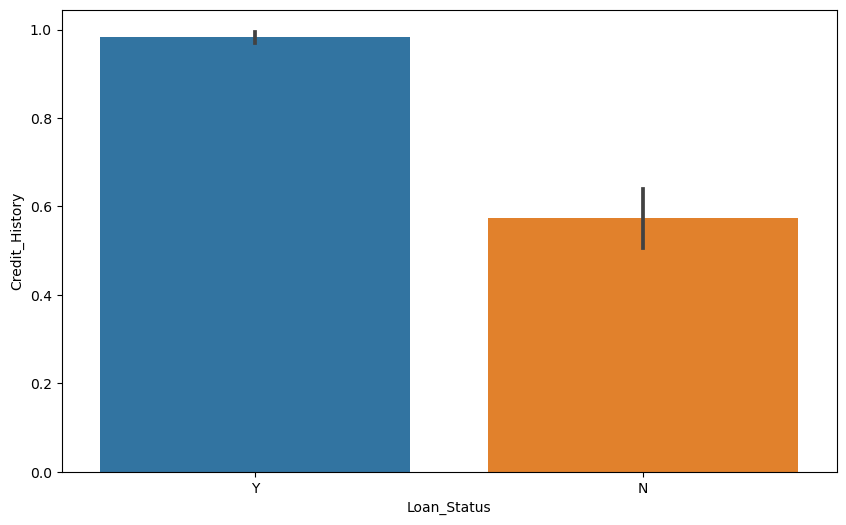

In [144]:
for bi in num.columns:
    plt.figure(figsize=(10,6))
    sns.barplot(x=cat['Loan_Status'], y=num[bi])
    plt.show()

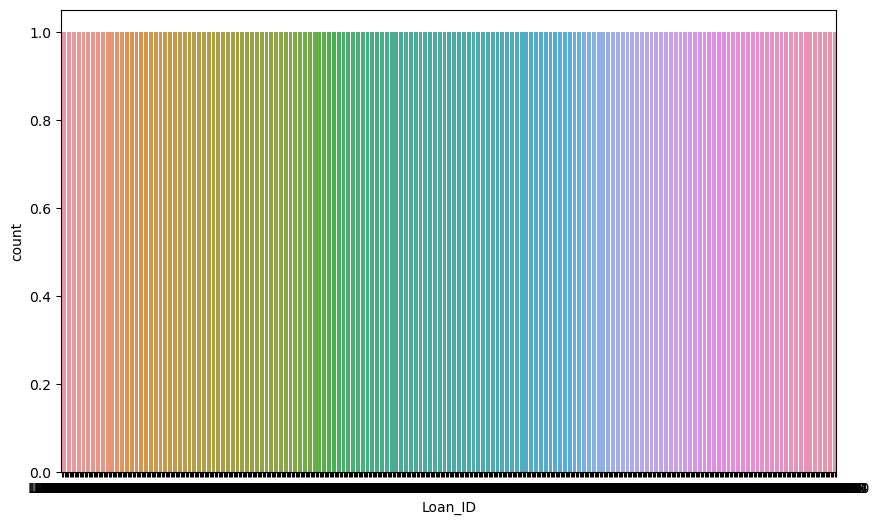

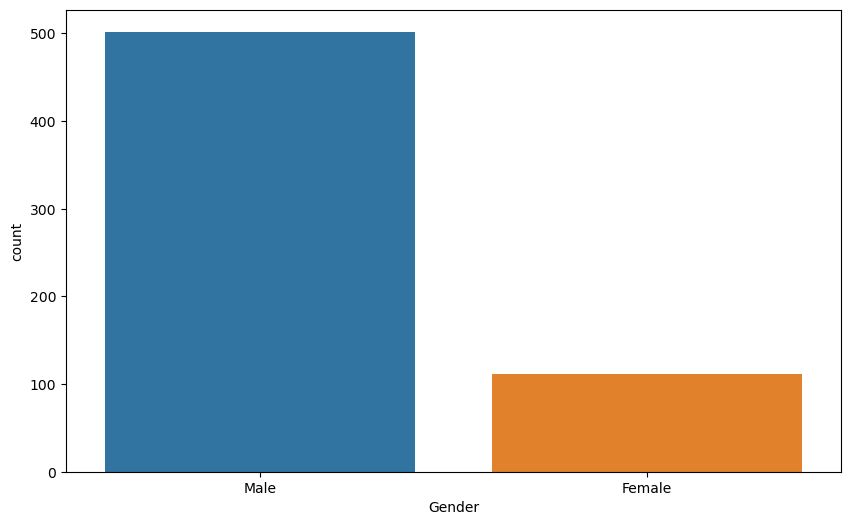

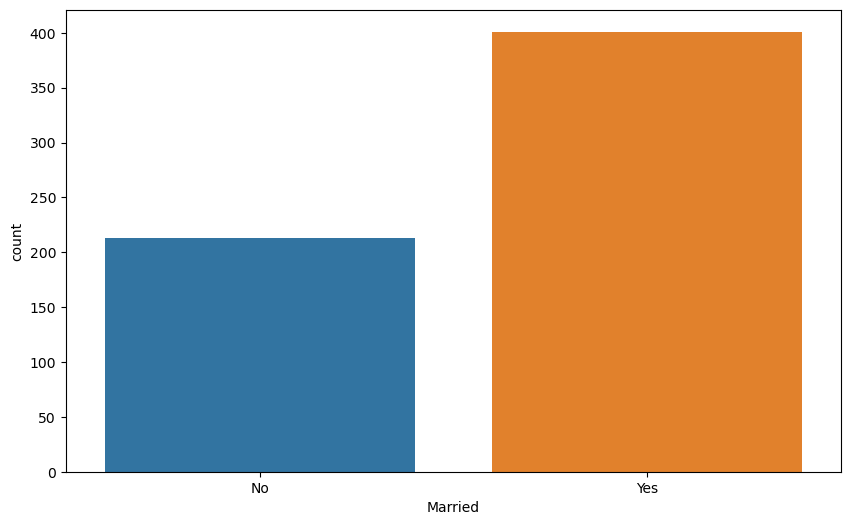

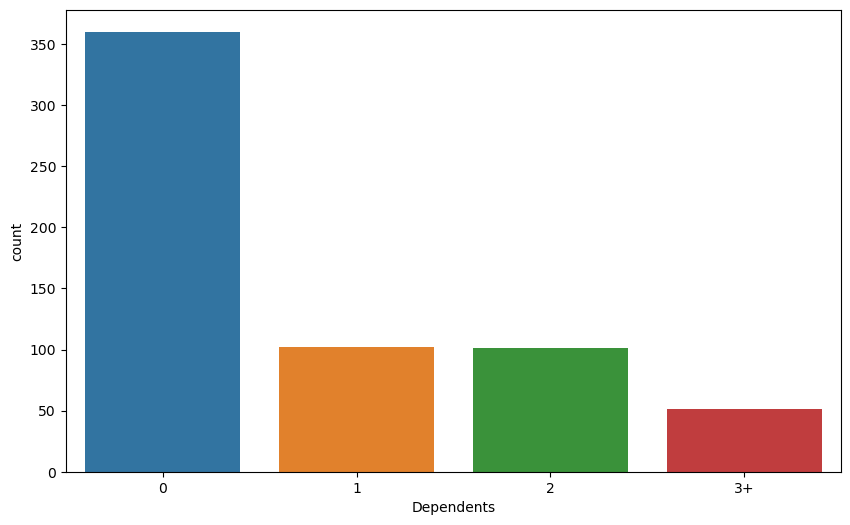

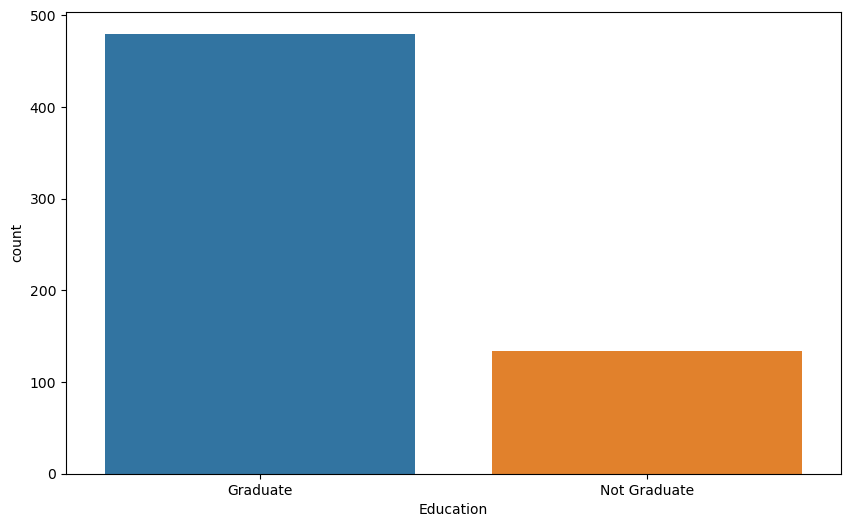

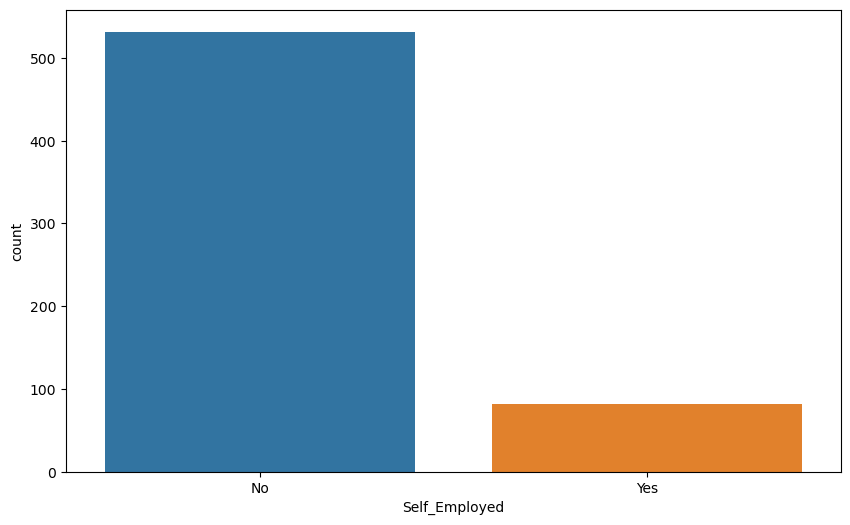

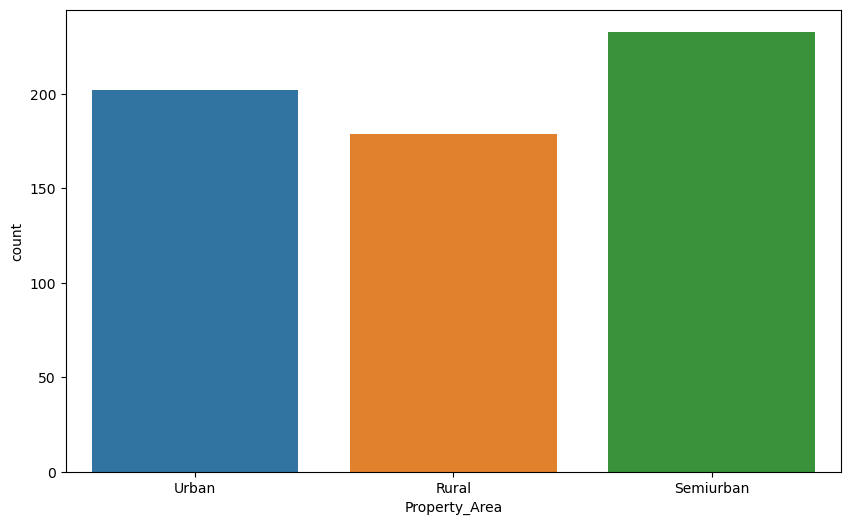

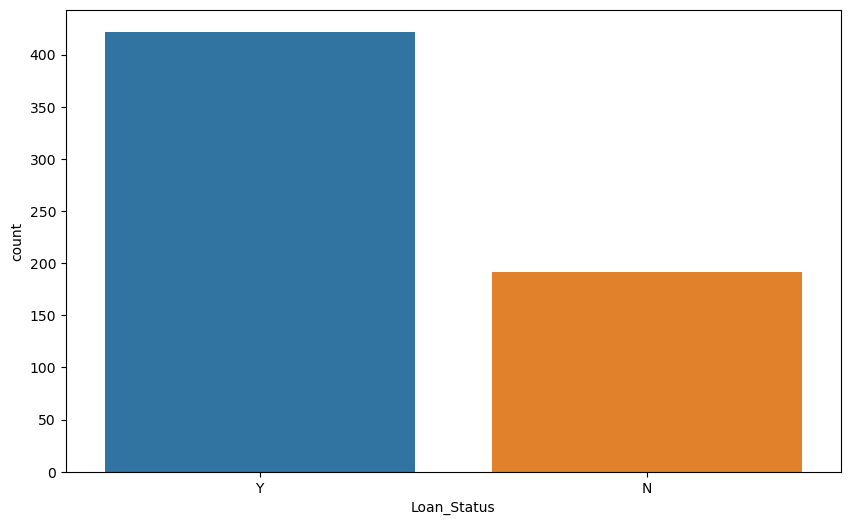

In [145]:
for bi_cat in cat:
    plt.figure(figsize=(10,6))
    sns.countplot(x=cat[bi_cat])
    plt.show()
    

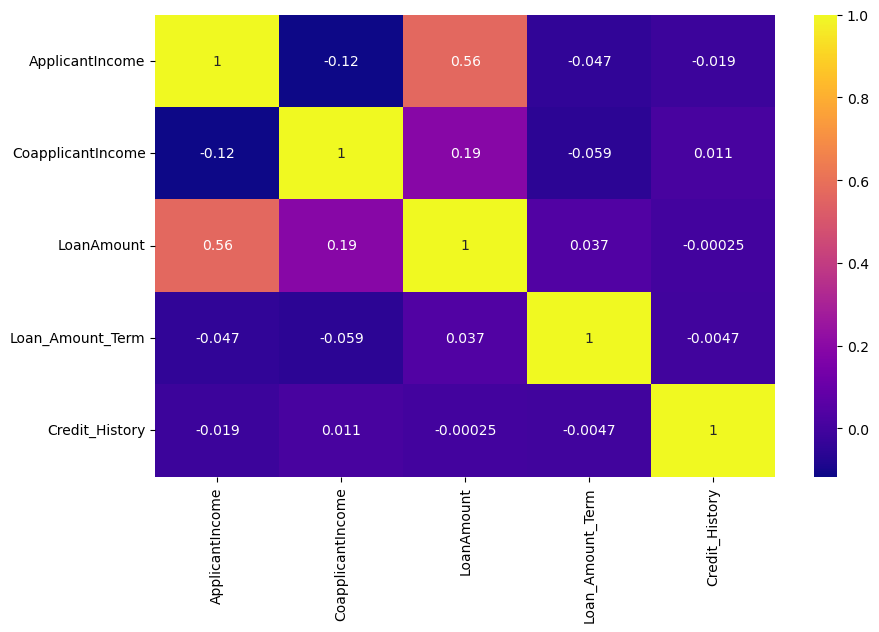

In [148]:
sns.heatmap(df.corr(), annot=True, cmap='plasma')
plt.show()

In [97]:
# Outlier detection 

In [150]:

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3-q1

ll = (q1-1.5*iqr)
ul = (q3+1.5*iqr)

print(iqr)

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64


In [151]:
df = df[~((df<ll)|(df>ul)).any(axis=1)]

In [152]:
df.shape

(396, 13)

In [156]:
cat = df.select_dtypes(include='object')
num = df.select_dtypes(include=np.number)

In [ ]:
# now let's perform the transformation

In [153]:
from sklearn.preprocessing import PowerTransformer

In [165]:
pt = PowerTransformer()

In [170]:

num = pd.DataFrame(pt.fit_transform(num), columns=num.columns)

In [171]:
# Now let's apply scaling

In [172]:
from sklearn.preprocessing import StandardScaler

In [173]:
sc = StandardScaler()

In [176]:
sc_num = pd.DataFrame(sc.fit_transform(num), columns=num.columns)

In [177]:
# Now let's do the encoding

In [179]:
cat = cat.drop('Loan_ID', axis=1)

In [185]:
cat.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y


In [181]:
gender = pd.get_dummies(cat['Gender'], drop_first=True)

In [187]:
married = pd.get_dummies(cat['Married'], drop_first=True)
education = pd.get_dummies(cat['Education'], drop_first=True)
self_employed = pd.get_dummies(cat['Self_Employed'], drop_first=True)
property_area = pd.get_dummies(cat['Property_Area'], drop_first=True)


In [192]:
new_cat = pd.concat([cat, married, education, self_employed, property_area, gender], axis=1)

In [193]:
new_cat1 = new_cat.drop(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], axis=1)

In [197]:
new_cat1.head(3)

,Dependents,Loan_Status,Yes,Not Graduate,Yes,Semiurban,Urban,Male
0,0,Y,0,0,0,0,1,1
1,1,N,1,0,0,0,0,1
2,0,Y,1,0,1,0,1,1


In [216]:
married = pd.DataFrame(new_cat1.iloc[:, 2])

In [256]:
# marr = married.rename(columns={'Yes','married'})

In [257]:
new_cat1.columns = ['dependent', 'loan_status', 'married', 'not graduate', 'self employed', 'semi urban','urban','gender' ]

In [313]:
df_n = pd.concat([num_new, new_cat1], axis=1)

In [296]:
from sklearn.preprocessing import LabelEncoder

In [297]:
le = LabelEncoder()

In [314]:
df_n['loan_status'] = le.fit_transform(df['loan_status'])

In [343]:
df_n.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,dependent,loan_status,married,not graduate,self employed,semi urban,urban,gender
0,5849,0.0,120.0,360.0,1.0,0,1,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,0,1,0,0,0,0,1
2,3000,0.0,66.0,360.0,1.0,0,1,1,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,0,1,1,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,1,0,0,0,0,1,1


In [346]:
df_n.dropna(axis=0, inplace=True)

In [358]:
df_n

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,dependent,loan_status,married,not graduate,self employed,semi urban,urban,gender
0,5849,0.0,120.0,360.0,1.0,0,1,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,0,1,0,0,0,0,1
2,3000,0.0,66.0,360.0,1.0,0,1,1,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,0,1,1,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,3987,1411.0,157.0,360.0,1.0,2,1,1,1,0,0,0,1
608,3232,1950.0,108.0,360.0,1.0,0,1,1,0,0,0,0,1
609,2900,0.0,71.0,360.0,1.0,0,1,0,0,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,1,1


In [347]:
X = df_n.drop('loan_status', axis=1)
y = df_n['loan_status']

In [300]:
# Now let's us build the build

In [348]:
from sklearn.model_selection import train_test_split

In [349]:
xtrain, xtest, ytrain, ytest =  train_test_split(X,y, random_state=46)

In [351]:
xtrain.shape

(297, 12)

In [352]:
xtest.shape

(99, 12)

In [353]:
ytrain.shape

(297,)

In [354]:
ytest.shape

(99,)

In [355]:
# let's use the Linear Regression algorithm

In [356]:
from sklearn.linear_model import LinearRegression

In [340]:
Lr = LinearRegression()

In [357]:
lr_model = Lr.fit(xtrain, ytrain)

ValueError: could not convert string to float: '3+'